In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# **Problem Statement 1(Delivery Time)**

In [6]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [7]:
delivery_T = pd.read_csv('delivery_time.csv')
delivery_T

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
delivery_T.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)

In [9]:
delivery_T.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


**Here, Delivery Time is the dependent variable.**

In [10]:
model=smf.ols('Delivery_Time~Sorting_Time',data=delivery_T).fit()

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

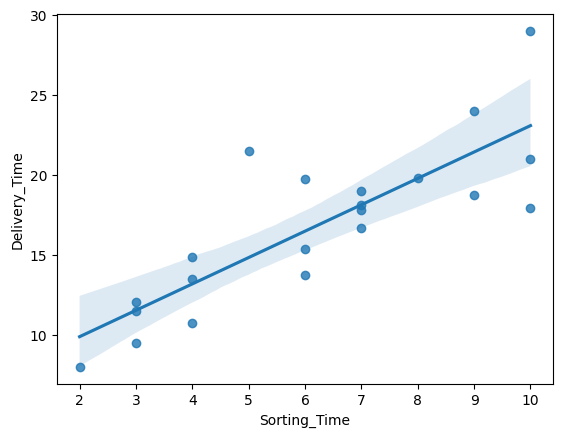

In [11]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=delivery_T)

In [12]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [13]:
delivery_T['prediction_values']=model.fittedvalues

In [14]:
delivery_T['Error_values']=model.resid

In [15]:
delivery_T['Y']=6.582734+1.649020*delivery_T['Sorting_Time']+delivery_T['Error_values']
delivery_T.head()

,Delivery_Time,Sorting_Time,prediction_values,Error_values,Y
0,21.00,10,23.072933,-2.072933,21.000001
1,13.50,4,13.178814,0.321186,13.500000
2,19.75,6,16.476853,3.273147,19.750001
3,24.00,9,21.423913,2.576087,24.000001
4,29.00,10,23.072933,5.927067,29.000001


In [16]:
print(model.rsquared,model.rsquared_adj)

0.6822714748417231 0.6655489208860244


**Now performing Log transformation(Delivery Time)**

In [17]:
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (1).csv


In [18]:
delivery_T=pd.read_csv('delivery_time.csv')
delivery_T.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [19]:
delivery_T.rename(columns={'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},inplace=True)

In [20]:
delivery_T['DeliveryTime_log']=np.log(delivery_T['DeliveryTime'])
delivery_T.head()

,DeliveryTime,SortingTime,DeliveryTime_log
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


<Axes: xlabel='SortingTime', ylabel='Density'>

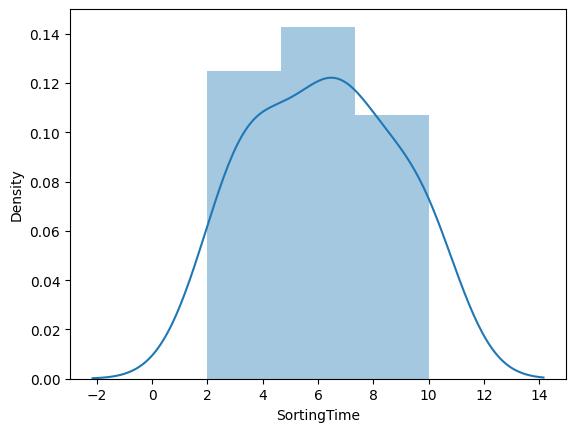

In [21]:
sns.distplot(delivery_T['SortingTime'])

<Axes: xlabel='DeliveryTime_log', ylabel='Density'>

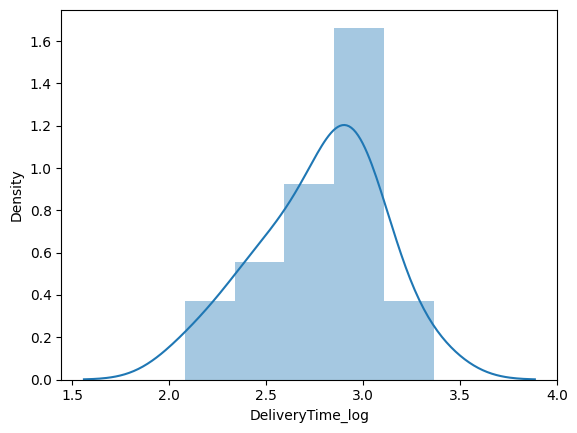

In [22]:
sns.distplot(delivery_T['DeliveryTime_log'])

In [23]:
x=delivery_T['SortingTime']
y=delivery_T['DeliveryTime_log']

In [24]:
model=smf.ols('y~x',data=delivery_T).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime_log'>

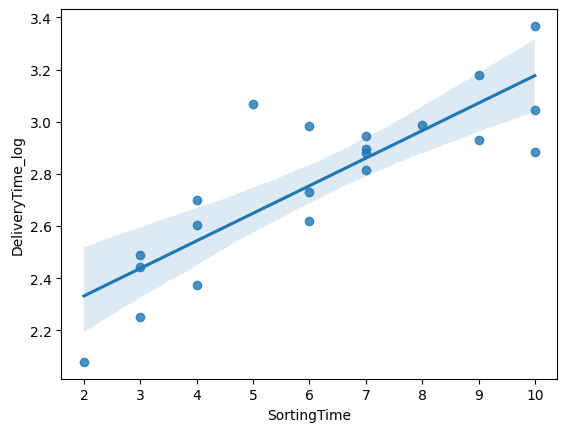

In [25]:
sns.regplot(x=x,y=y,data=delivery_T)

In [26]:
model.params

Intercept    2.121372
x            0.105552
dtype: float64

In [27]:
delivery_T['Predicted_values']=model.fittedvalues
delivery_T['Error_values']=model.resid
delivery_T['Y']=2.121372+0.105552*delivery_T['SortingTime']+delivery_T['Error_values']
delivery_T.head()

,DeliveryTime,SortingTime,DeliveryTime_log,Predicted_values,Error_values,Y
0,21.00,10,3.044522,3.176888,-0.132365,3.044527
1,13.50,4,2.602690,2.543578,0.059111,2.602691
2,19.75,6,2.983153,2.754681,0.228472,2.983156
3,24.00,9,3.178054,3.071336,0.106718,3.178058
4,29.00,10,3.367296,3.176888,0.190408,3.367300


In [28]:
print(model.rsquared,model.rsquared_adj)

0.7109478980584187 0.6957346295351776


**#SQRT Transformation(Delivery Time)**

In [29]:
uploaded = files.upload()

Saving delivery_time.csv to delivery_time (2).csv


In [30]:
delivery_T=pd.read_csv('delivery_time.csv')
delivery_T.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [31]:
delivery_T.rename(columns={'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},inplace=True)

In [32]:
delivery_T['DeliveryTime_Sqrt']=np.sqrt(delivery_T['DeliveryTime'])

<Axes: xlabel='DeliveryTime_Sqrt', ylabel='Density'>

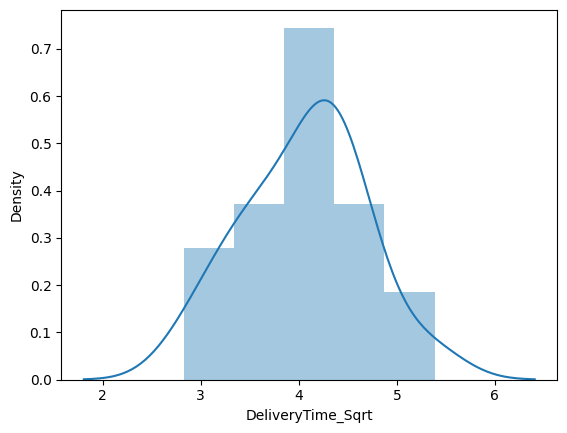

In [33]:
sns.distplot(delivery_T['DeliveryTime_Sqrt'])

<Axes: xlabel='SortingTime', ylabel='Density'>

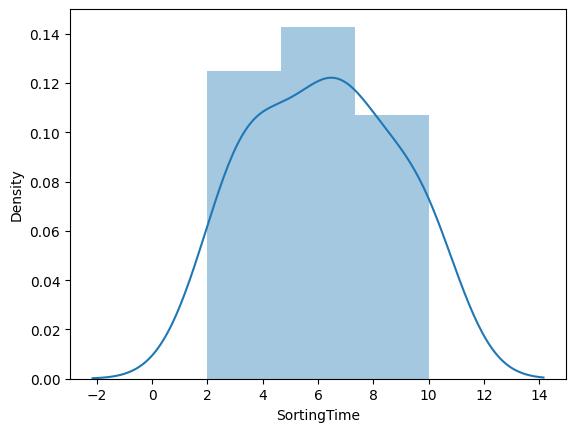

In [34]:
sns.distplot(delivery_T['SortingTime'])

In [35]:
x=delivery_T['SortingTime']
y=delivery_T['DeliveryTime_Sqrt']

In [36]:
model=smf.ols('y~x',data=delivery_T).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime_Sqrt'>

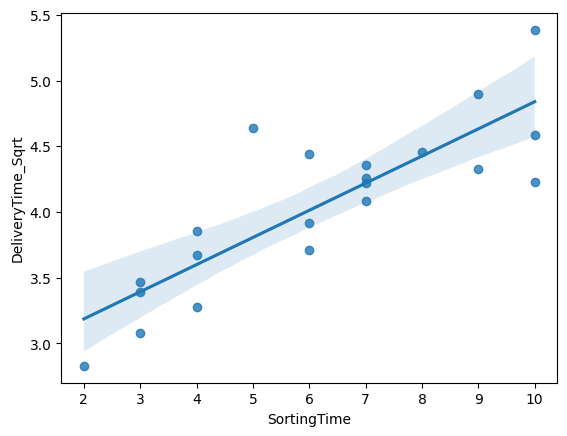

In [37]:
sns.regplot(x=x,y=y,data=delivery_T)

In [38]:
model.params

Intercept    2.772731
x            0.206632
dtype: float64

In [39]:
delivery_T['Predicted_values']=model.fittedvalues
delivery_T['Error_values']=model.resid
delivery_T['Y']=2.772731+0.206632*delivery_T['SortingTime']+delivery_T['Error_values']
delivery_T.head()

,DeliveryTime,SortingTime,DeliveryTime_Sqrt,Predicted_values,Error_values,Y
0,21.00,10,4.582576,4.839049,-0.256474,4.582577
1,13.50,4,3.674235,3.599258,0.074976,3.674235
2,19.75,6,4.444097,4.012522,0.431575,4.444098
3,24.00,9,4.898979,4.632417,0.266562,4.898981
4,29.00,10,5.385165,4.839049,0.546116,5.385167


In [40]:
print(model.rsquared,model.rsquared_adj)

0.704049871541756 0.6884735489913221


**In delivery dataset we have used 3 transformations but among all transformations log transformation gave the maximum result.**

# **#Problem Statement 2(Salary data)**

In [41]:
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [42]:
Salary=pd.read_csv('Salary_Data.csv')
Salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
Salary1=Salary.copy()

In [44]:
Salary.count

<bound method DataFrame.count of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

<Axes: xlabel='Salary', ylabel='Density'>

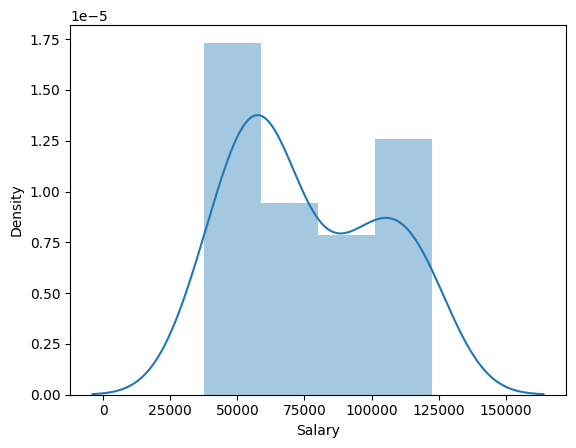

In [45]:
sns.distplot(Salary['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

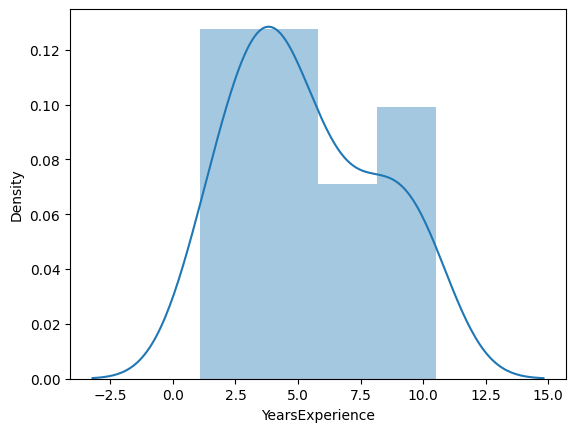

In [46]:
sns.distplot(Salary['YearsExperience'])

In [47]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=Salary).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

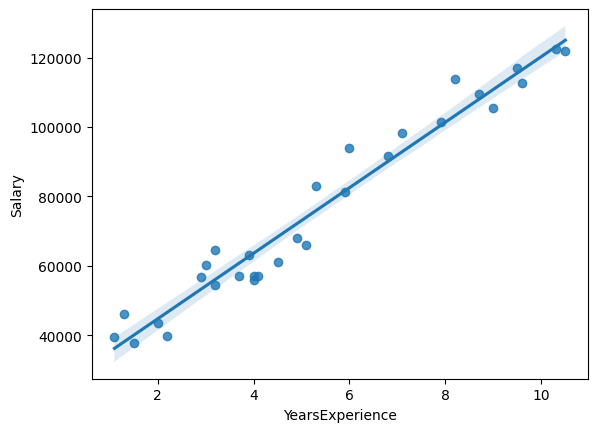

In [48]:
sns.regplot(x="YearsExperience",y="Salary",data=Salary)

In [49]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [50]:
Salary['predicted_values']=model.fittedvalues

In [51]:
Salary['Error_values']=model.resid

In [52]:
Salary.head()

,YearsExperience,Salary,predicted_values,Error_values
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


In [53]:
Salary['Y']=25792.200199+9449.962321*Salary['YearsExperience']+Salary['Error_values']

In [54]:
Salary.head()

,YearsExperience,Salary,predicted_values,Error_values,Y
0,1.1,39343.0,36187.158752,3155.841248,39343.000000
1,1.3,46205.0,38077.151217,8127.848783,46205.000000
2,1.5,37731.0,39967.143681,-2236.143681,37731.000000
3,2.0,43525.0,44692.124842,-1167.124842,43524.999999
4,2.2,39891.0,46582.117306,-6691.117306,39890.999999


In [55]:
print(model.rsquared,model.rsquared_adj)

0.9569566641435086 0.9554194021486339


**#Log Transformation(Salary Data)**

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [57]:
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [58]:
Salary1=pd.read_csv('Salary_Data.csv')
Salary1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [59]:
Salary1['Salary_log']=np.log(Salary1['Salary'])
Salary1.head()

,YearsExperience,Salary,Salary_log
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906


<Axes: xlabel='YearsExperience', ylabel='Density'>

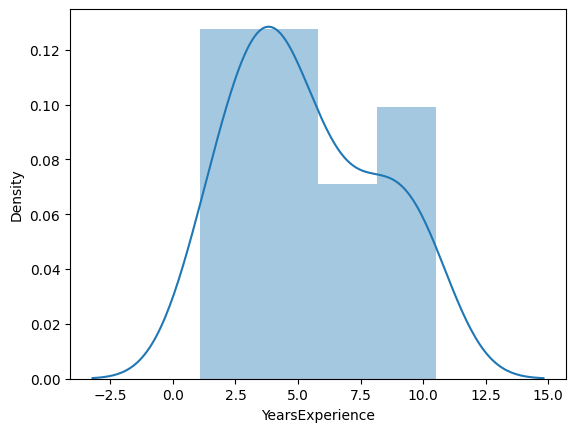

In [60]:
sns.distplot(Salary1['YearsExperience'])

<Axes: xlabel='Salary_log', ylabel='Density'>

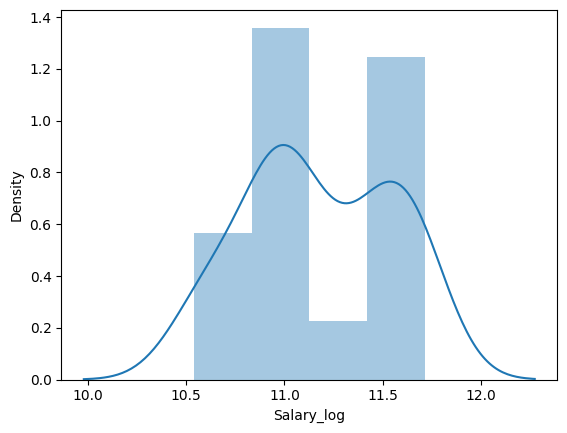

In [61]:
sns.distplot(Salary1['Salary_log'])

In [62]:
x=Salary1['YearsExperience']
y=Salary1['Salary_log']

In [63]:
model=smf.ols('y~x',data=Salary1).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary_log'>

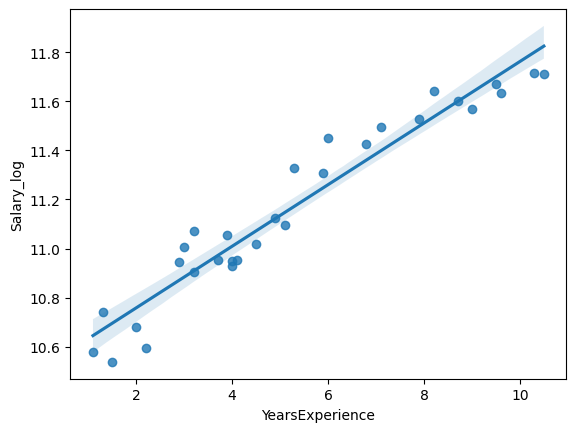

In [64]:
sns.regplot(x=x,y=y,data=Salary1)

In [65]:
model.params

Intercept    10.507402
x             0.125453
dtype: float64

In [66]:
Salary1['Predicted_values']=model.fittedvalues

In [67]:
Salary1['Error_values']=model.resid

In [68]:
Salary1['Y']=10.507402+0.125453*Salary1['YearsExperience']+Salary1['Error_values']

In [69]:
Salary1.head()

,YearsExperience,Salary,Salary_log,Predicted_values,Error_values,Y
0,1.1,39343.0,10.580073,10.645400,-0.065327,10.580074
1,1.3,46205.0,10.740843,10.670491,0.070353,10.740844
2,1.5,37731.0,10.538237,10.695581,-0.157344,10.538238
3,2.0,43525.0,10.681091,10.758308,-0.077217,10.681091
4,2.2,39891.0,10.593906,10.783398,-0.189492,10.593906


In [70]:
print(model.rsquared,model.rsquared_adj)

0.9319671194084196 0.929537373673006


**#SQRT Transformation(Salary Time)**

In [71]:
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data (2).csv


In [72]:
Salary2=pd.read_csv('Salary_Data.csv')
Salary2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [73]:
Salary2['salary_sqrt']=np.sqrt(Salary2['Salary'])
Salary2.head()

,YearsExperience,Salary,salary_sqrt
0,1.1,39343.0,198.350700
1,1.3,46205.0,214.953483
2,1.5,37731.0,194.244691
3,2.0,43525.0,208.626460
4,2.2,39891.0,199.727314


<Axes: xlabel='YearsExperience', ylabel='Density'>

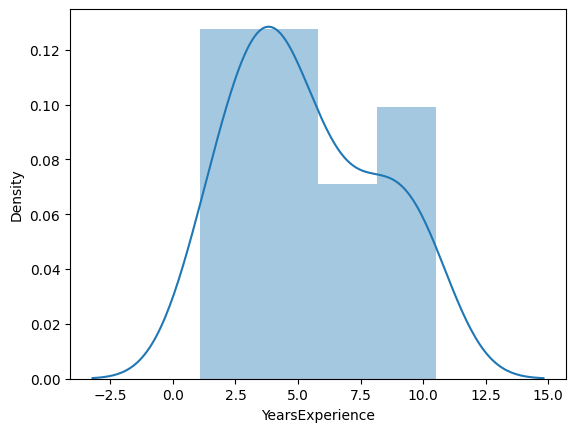

In [74]:
sns.distplot(Salary2['YearsExperience'])

<Axes: xlabel='salary_sqrt', ylabel='Density'>

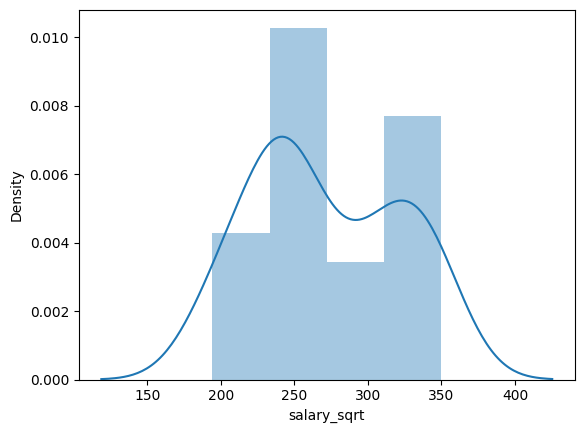

In [75]:
sns.distplot(Salary2['salary_sqrt'])

In [76]:
x=Salary2['YearsExperience']
y=Salary2['salary_sqrt']

In [77]:
model=smf.ols('y~x',data=Salary2).fit()

<Axes: xlabel='YearsExperience', ylabel='salary_sqrt'>

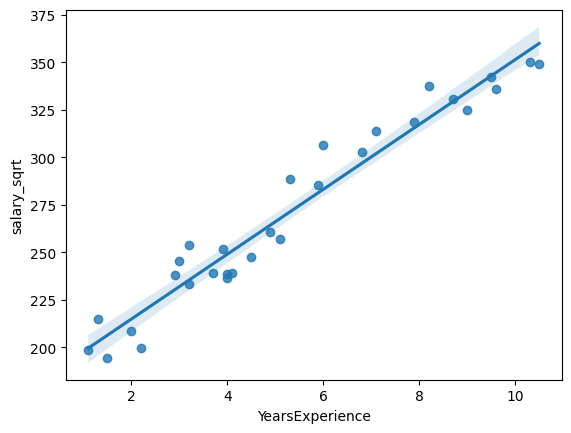

In [78]:
sns.regplot(x=x,y=y,data=Salary2)

In [79]:
model.params

Intercept    180.700221
x             17.056532
dtype: float64

In [80]:
Salary2['Predicted_values']=model.fittedvalues
Salary2['Error_values']=model.resid
Salary2['Y']=180.700221+17.056532*Salary2['YearsExperience']+Salary2['Error_values']
Salary2.head()

,YearsExperience,Salary,salary_sqrt,Predicted_values,Error_values,Y
0,1.1,39343.0,198.350700,199.462407,-1.111707,198.350699
1,1.3,46205.0,214.953483,202.873713,12.079770,214.953483
2,1.5,37731.0,194.244691,206.285019,-12.040328,194.244691
3,2.0,43525.0,208.626460,214.813286,-6.186825,208.626460
4,2.2,39891.0,199.727314,218.224592,-18.497278,199.727314


In [81]:
print(model.rsquared,model.rsquared_adj)

0.9498353533865289 0.9480437588646192


**By using normal,log,sqrt transformation the best results are obtained from sqrt transformation.**